# Chapter 1: Introduction to Clustering

## Activity 1.01: Implementing k-means Clustering

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)

%matplotlib inline

## Seeds Dataset: Silhouette Score

Per the UCI Data Repository, the fields in the Seeds dataset we will be using correspond to:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [2]:
seeds = pd.read_csv('Seed_Data.csv')

In [3]:
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]
y = seeds['target']

In [5]:
# See what our features look like
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
## Bring back the function we created earlier

def k_means(X, K):
    # Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    
    # Randomly initialize Kcentroids
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    
    # While loop repeats process until difference between new/old centroids = 0 
    while True:
        # Euclidean distances are calculated for each point relative to centroids, and then np.argmin returns
        # the index location of the minimal distance - which cluster a point is assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
        # Take mean of points within clusters to find new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [7]:
# Convert from Pandas dataframe to NumPy matrix
X_mat = X.values

In [8]:
# Run our Seeds matrix through the k_means function we created earlier
centroids, labels, centroids_history, labels_history = k_means(X_mat, 3)

In [9]:
# See what labels we got
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


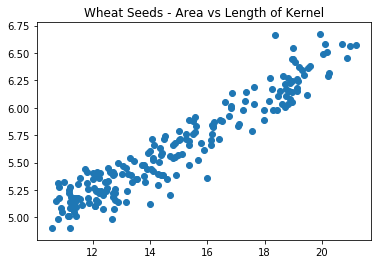

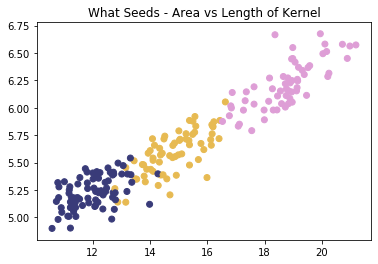

In [10]:
# See how well our implementation of K-Means did

plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

plt.scatter(X['A'], X['LK'], c=labels, cmap='tab20b')
plt.title('What Seeds - Area vs Length of Kernel')
plt.show()

In [11]:
# Calculate Silhouette Score

silhouette_score(X[['A','LK']], labels)

0.5875704550892767